In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
# ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the dataset

df = pd.read_csv('../data/creditcard.csv')

In [5]:
#To dosplay all the 31 columns

pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Dataset Composition:**<br>
The dataset encompasses a total of **31 columns**, where the first column corresponds to 'Time,' and columns 2 to 29 contain confidential features labeled as **V1 through V28**. These features have been derived through **Principal Component Analysis (PCA)**. Notably, the 'Amount' and 'Time' features have not undergone PCA transformation, providing valuable insights into the original attributes.

The last two columns, labeled '**Amount**' and '**Class**,' play distinctive roles in our analysis. '**Amount**' signifies the transaction amount, while '**Class**' serves as the response variable. The binary nature of the '**Class**' feature assigns a value of '**1**' to instances of fraud and '**0**' to non-fraudulent transactions. This binary distinction establishes a foundation for a focused exploration of predictive capabilities, facilitating a comprehensive understanding of the model's efficacy in identifying fraudulent activities.

As our analysis progresses, the transparency in feature composition enables a more informed evaluation of the model's performance, particularly in distinguishing between fraudulent and non-fraudulent transactions.


In [7]:
#To print concise summary of our Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Dataset Overview:**<br>
The dataset demonstrates a **robust structure**, free from any **null values** throughout all its features. Comprising 30 columns with numerical data represented as floating-point values, the 'Class' column emerges as a **categorical variable**. It exclusively adopts values of '**0**' and '**1**' to signify **non-fraudulent** and **fraudulent transactions**, respectively. This impeccable **data integrity** and distinct **class separation** establish a sturdy foundation for training and validating the machine learning model. It ensures the generation of reliable predictive insights for detecting fraudulent activities.

In [8]:
#To print column names

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
#Checking for duplicate values

duplicate_values = df[df.duplicated()]
duplicate_values

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


**Data Cleansing:**<br>
During the exploration of the dataset, it was discovered that **1081 rows** contain **duplicate values**. In order to maintain data cleanliness and mitigate the risk of potential bias in the model, a deliberate choice has been made to **exclude these duplicate entries**. This meticulous data refinement process ensures that the model is trained on a **unique and representative set** of observations. By doing so, we enhance the model's capacity to generalize and provide accurate predictions, fostering a more robust and reliable machine learning framework.


In [10]:
#Remove the duplicate values

df.drop_duplicates(inplace = True)

In [12]:
#Getting statistics of 'Time', 'Amount', and  'Class' features

df[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,283726.000000,283726.000000,283726.000000
mean,94811.077600,88.472687,0.001667
std,47481.047891,250.399437,0.040796
min,0.000000,0.000000,0.000000
25%,54204.750000,5.600000,0.000000
50%,84692.500000,22.000000,0.000000
75%,139298.000000,77.510000,0.000000
max,172792.000000,25691.160000,1.000000


In [13]:
#Total fraud and normal transactions

print("The total Fraud (1) and Normal (0) transacrions are:")
df['Class'].value_counts()

The total Fraud (1) and Normal (0) transacrions are:


0    283253
1       473
Name: Class, dtype: int64

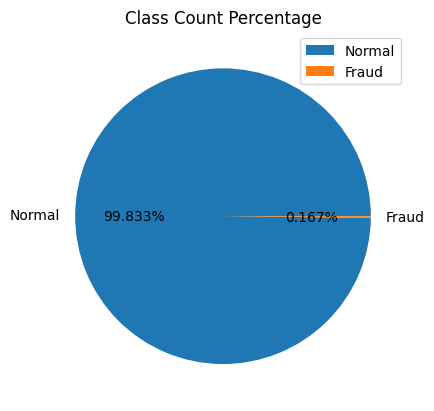

In [14]:
#Visualisation of imbalance of data through pie chart

plt.pie(df['Class'].value_counts(), labels= ["Normal" , "Fraud"] ,autopct='%1.3f%%') 
plt.title("Class Count Percentage")
plt.legend()
plt.show()

**Class Imbalance Analysis:**<br>
Fraudulent transactions constitute a mere **0.167%**, while the majority of the dataset, approximately **99.833%**, comprises normal transactions. This pronounced **imbalance** underscores the importance of employing **appropriate strategies** during the model training phase to address potential biases. Ensuring that the model can effectively discern and predict instances of fraud, despite their scarcity in the dataset, becomes paramount.

To optimize the model's sensitivity to fraudulent activities, various techniques may be considered. These include **oversampling**, **undersampling**, or the utilization of **specialized algorithms for imbalanced data**. Implementing these strategies will contribute to a more robust and effective machine learning model capable of accurately identifying and predicting instances of fraud.


## Feature Engineering

### Time Feature

In [15]:
#Adding "Hours" and "Minutes" columns to undetstand the data better from "Time" column which is in 'seconds' unit

timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

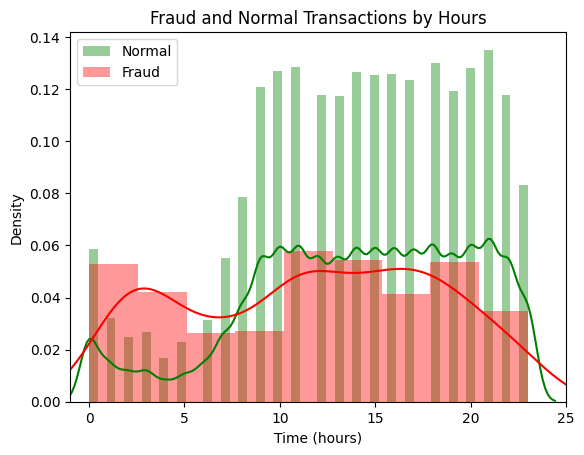

In [16]:
#Creating a distribution plot for fraud(red) and normal(green) transaction w.r.t time in hours

sns.distplot(df[df['Class'] == 0]['Time_hour'], label = 'Normal', color = 'g')  #For normal transactions
sns.distplot(df[df["Class"] == 1]['Time_hour'], label = 'Fraud', color = 'r')  #For fraud transactions

plt.title('Fraud and Normal Transactions by Hours')
plt.xlim([-1,25])
plt.xlabel('Time (hours)')
plt.legend()
plt.show()


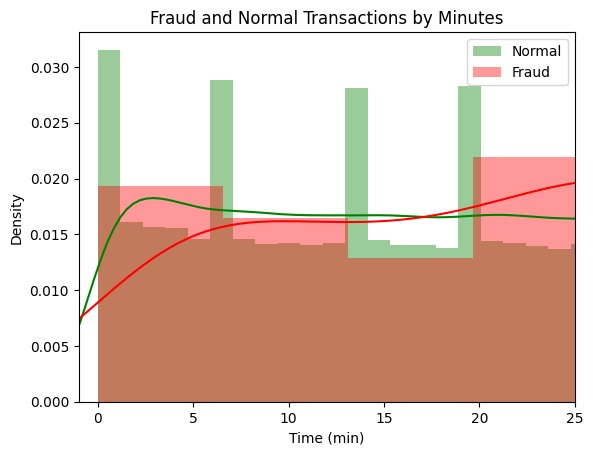

In [17]:
#Creating a distribution plot for fraud(red) and normal(green) transaction w.r.t time in minutes

sns.distplot(df[df['Class'] == 0]['Time_min'], label = 'Normal', color = 'g')  #For normal transactions
sns.distplot(df[df["Class"] == 1]['Time_min'], label = 'Fraud', color = 'r')  #For fraud transactions

plt.title('Fraud and Normal Transactions by Minutes')
plt.legend()
plt.xlabel('Time (min)')
plt.xlim([-1,25])
plt.show()

### Amount vs Class

In [18]:
#Statistics for Fraud Transaction Amounts

print("Statistics for Fraud Transation:")
df[df['Class'] == 1]['Amount'].describe()

Statistics for Fraud Transation:


count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
#Statistics for Normal Transaction Amounts

print("Statistics for Normal Transaction:")
df[df['Class'] == 0]['Amount'].describe()

Statistics for Normal Transaction:


count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

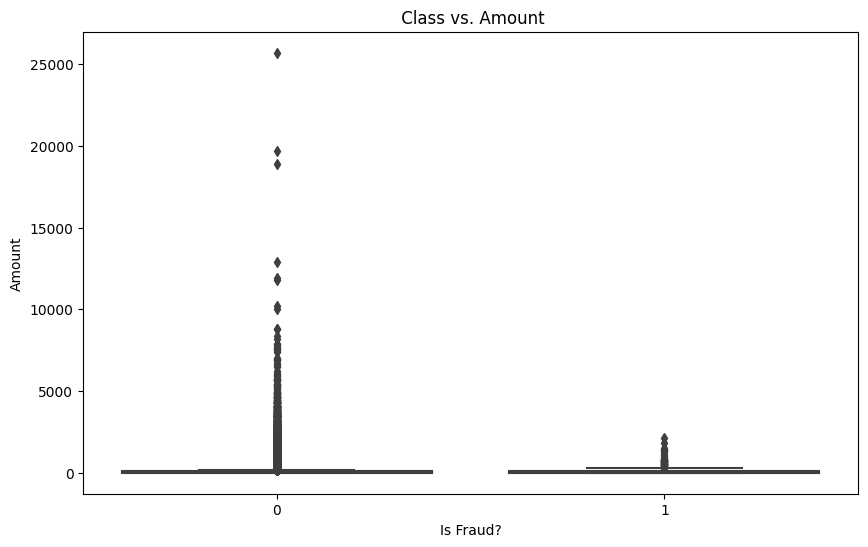

In [20]:
#Distribution of Amount Transaction

plt.figure(figsize = (10,6))
sns.boxplot(x = "Class", y = "Amount", data = df)

plt.xlabel("Is Fraud?")
plt.ylabel("Amount")
plt.title(" Class vs. Amount")

plt.show()

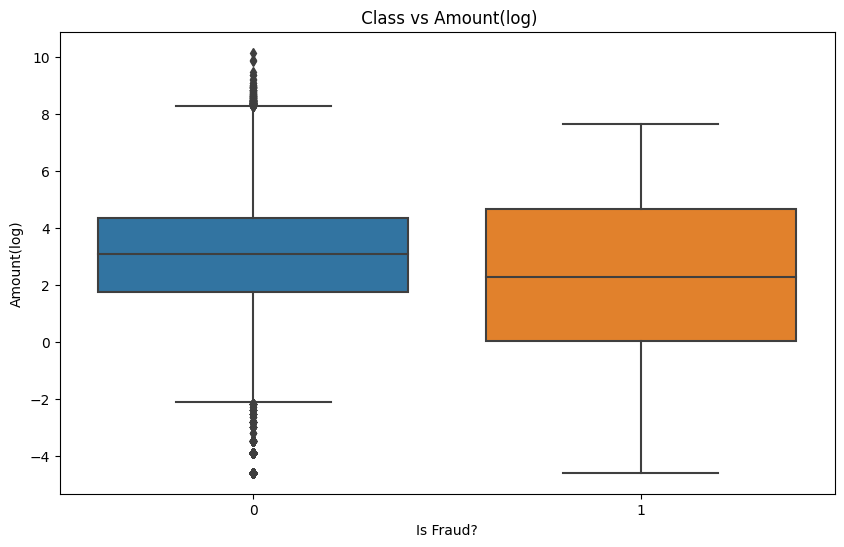

In [21]:
#Using np.log for better visualization of Amount Transaction

df['Amount_log'] = np.log(df.Amount + 0.01)


plt.figure(figsize = (10,6))
sns.boxplot(x = "Class", y = "Amount_log", data = df)

plt.xlabel("Is Fraud?")
plt.ylabel("Amount(log)")
plt.title(" Class vs Amount(log)")

plt.show()

**Statistical Characteristics Analysis:**<br>
A notable distinction emerges when comparing fraud and normal transactions in terms of their Interquartile Range (IQR). Fraudulent transactions display a higher IQR, indicating increased variability in the data compared to normal transactions. Interestingly, normal transactions exhibit higher individual values, particularly in the upper tail of the distribution, suggesting that the upper range of values for normal transactions extends further than that of fraudulent transactions.

This nuanced insight into the statistical characteristics of the data can significantly inform the model training process. It allows for a more comprehensive understanding of the features contributing to the identification of fraud, thereby enhancing the model's ability to discern and predict instances of fraudulent activities with greater accuracy.


A comprehensive analysis of the statistical characteristics reveals notable distinctions between real and fraudulent transactions. Real transactions exhibit a larger mean value, higher Q1, smaller Q3 and Q4, and a prevalence of larger outliers. Conversely, fraudulent transactions demonstrate a smaller Q1 and mean, larger Q4, and fewer outliers of smaller magnitudes.

These pronounced disparities underscore the importance of these features in distinguishing between the two classes. Understanding the distinct statistical profiles becomes crucial as it guides the machine learning model in effectively capturing the patterns indicative of fraud. This insight contributes significantly to enhanced predictive accuracy, enabling the model to discern and predict instances of fraudulent activities with greater precision.


### Amount vs Time

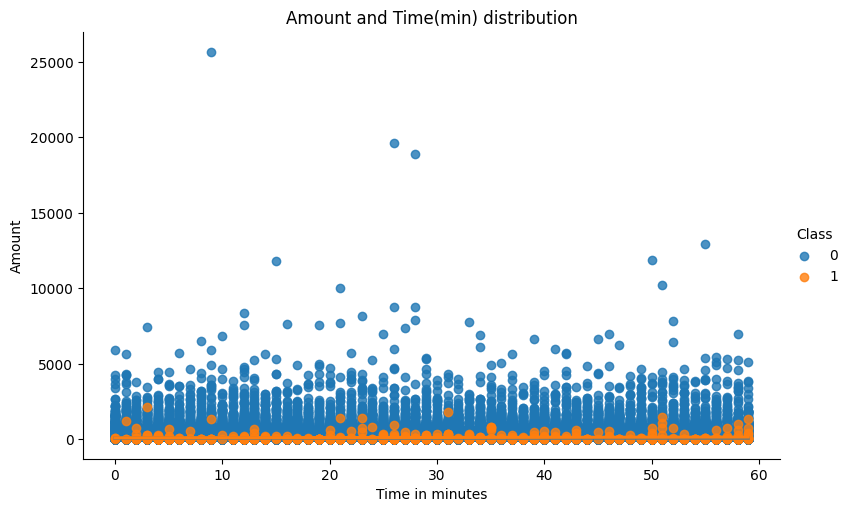

In [22]:
#Creating a scatterplot Amount w.r.t Time in Minutes 

sns.lmplot(x = 'Time_min', y = 'Amount', data = df, hue = 'Class', aspect = 1.6)

plt.title("Amount and Time(min) distribution")
plt.xlabel("Time in minutes")

plt.show()

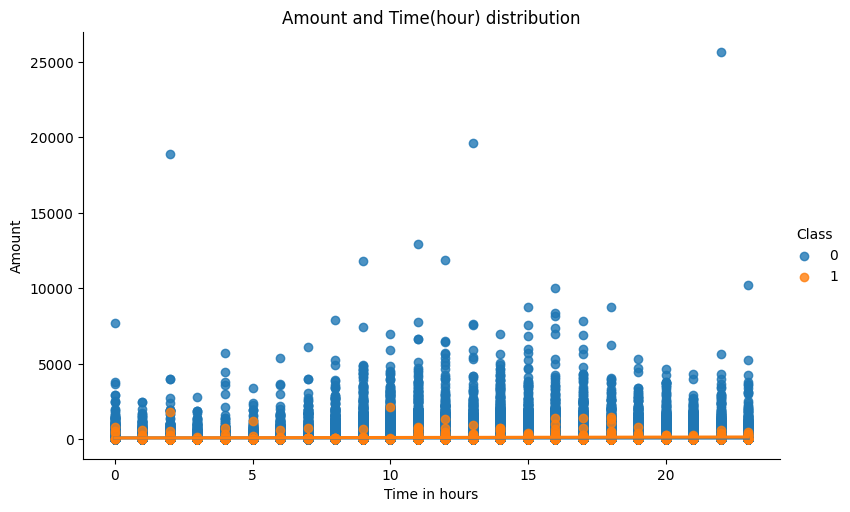

In [23]:
#Creating a scatterplot Amount w.r.t Time in Hours

sns.lmplot(x = 'Time_hour', y = 'Amount', data = df, hue = 'Class', aspect = 1.6)

plt.title("Amount and Time(hour) distribution")
plt.xlabel("Time in hours")
plt.show()

### V1 - V28

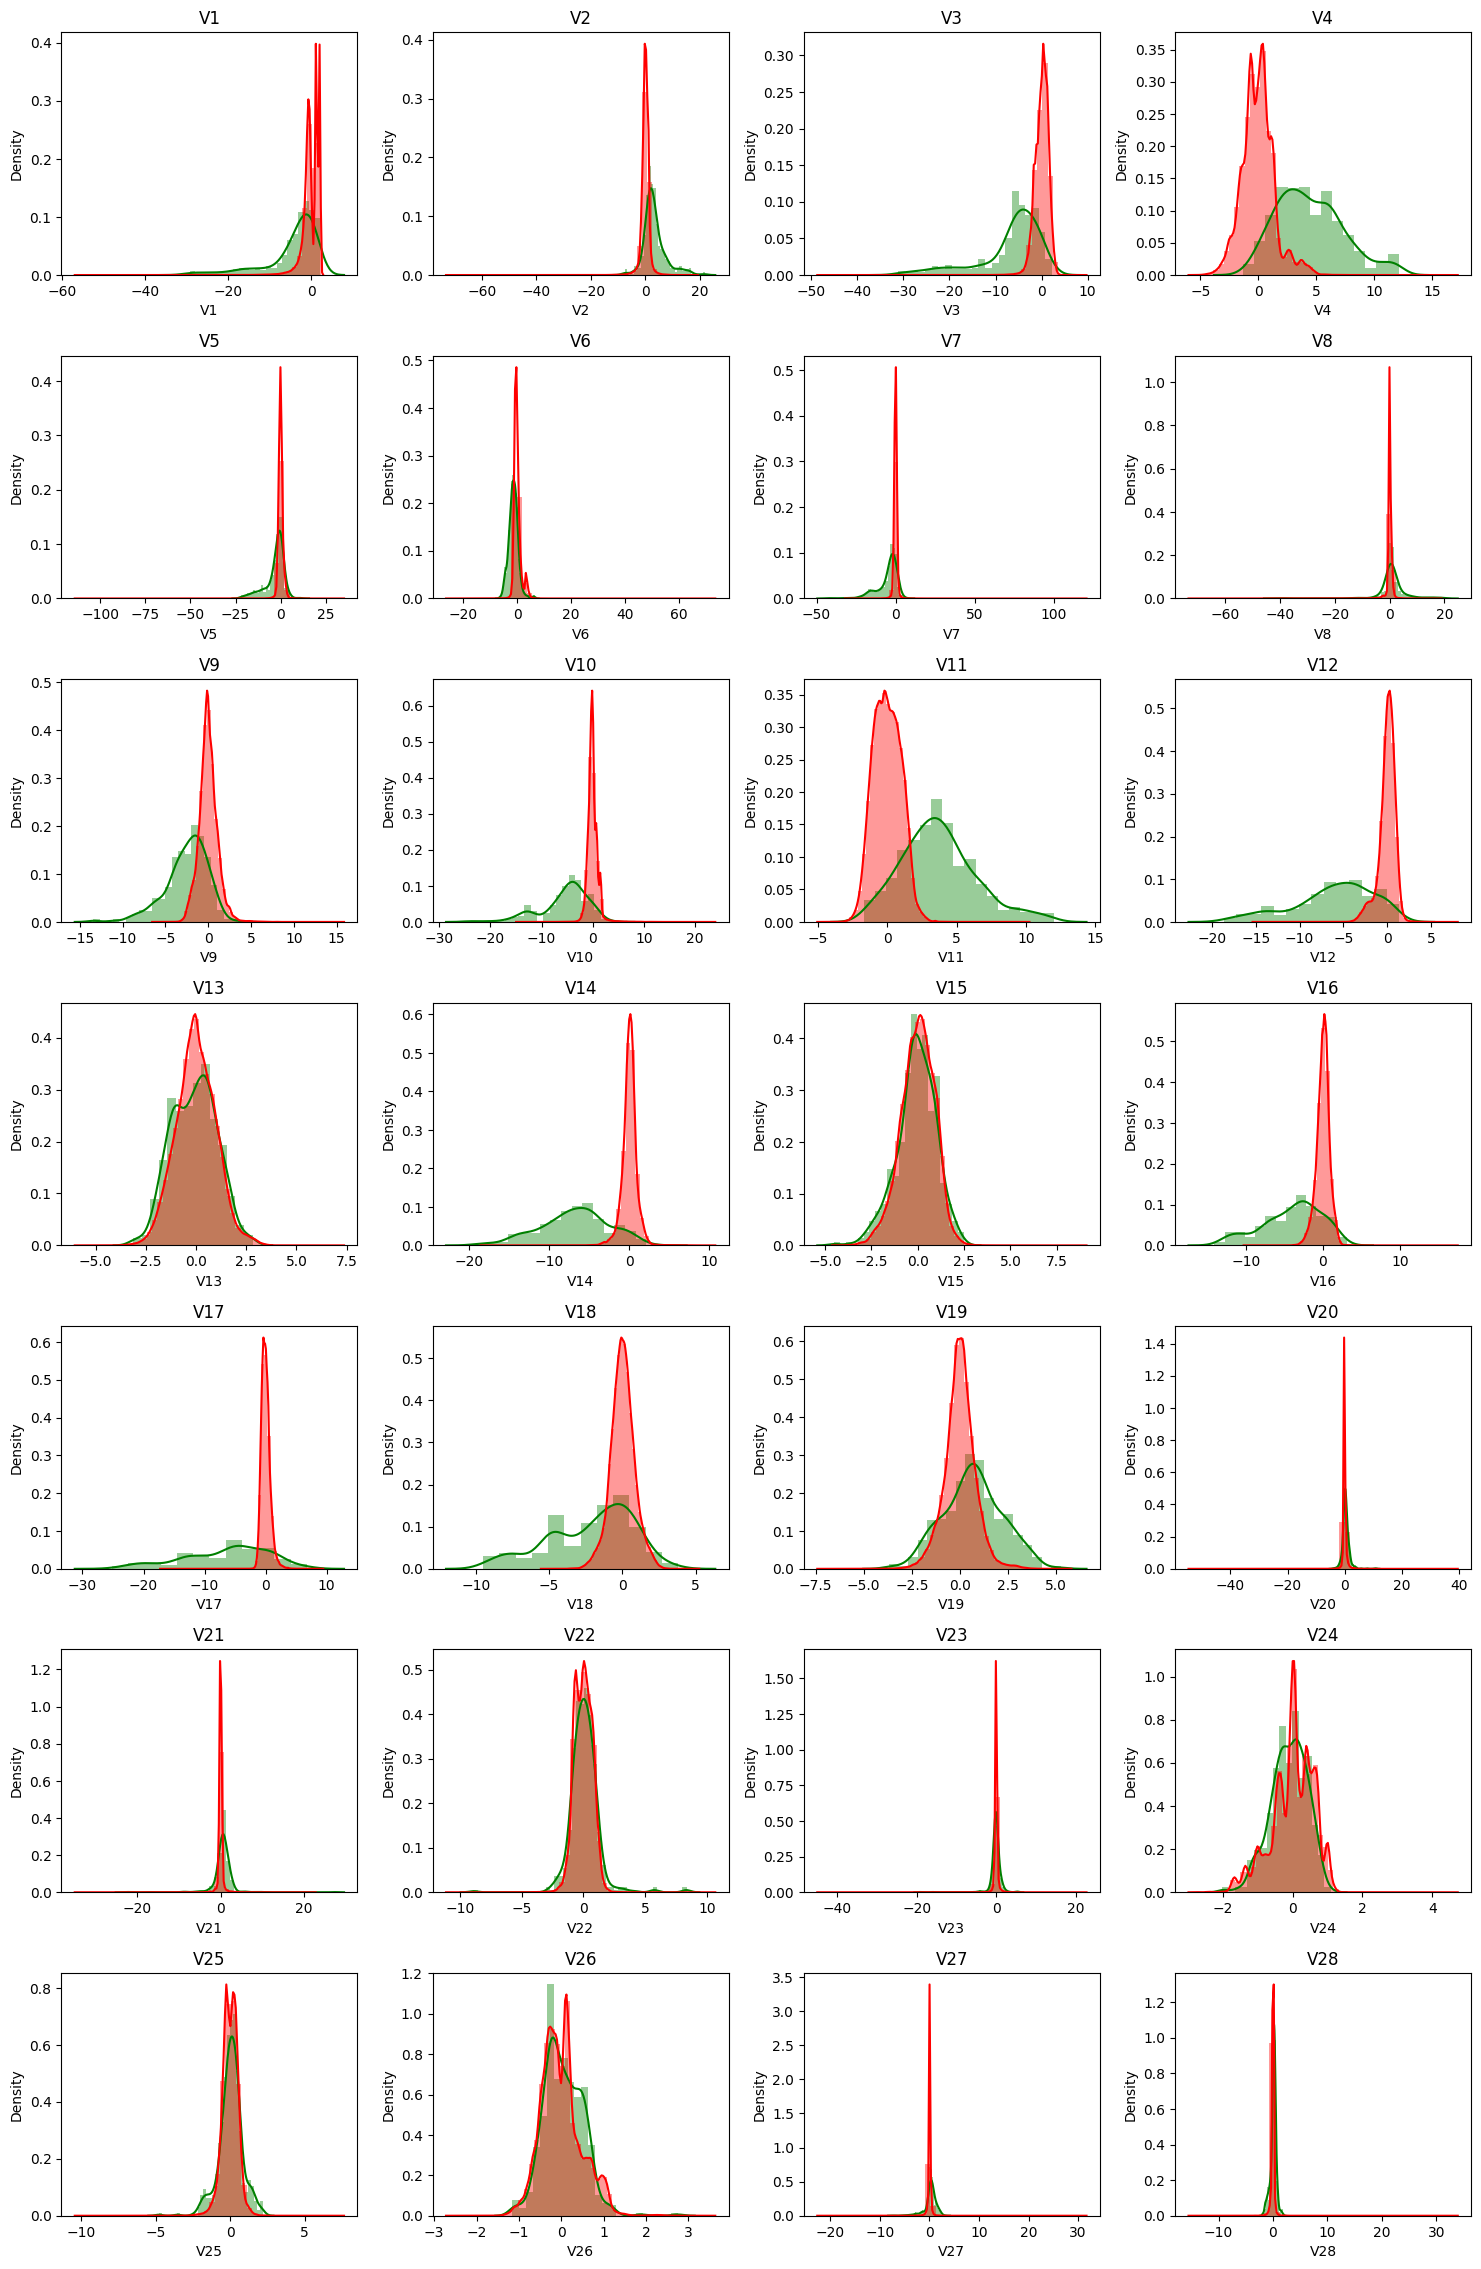

In [24]:
columns = df.iloc[:,1:29].columns

#Creating grids for boxplots of features
grid = gridspec.GridSpec(14,4) 
plt.figure(figsize=(15,45))

for n, col in enumerate(df[columns]):
    plt.subplot(grid[n])
    sns.distplot(df[col][df.Class == 1], color = 'g')
    sns.distplot(df[col][df.Class == 0], color = 'r')
    plt.ylabel("Density")
    plt.title(str(col))

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

**Feature Distributions Analysis:**<br>
In a more detailed examination of feature distributions concerning Class values 0 and 1, distinct patterns emerge. Features such as **V4** and **V11** exhibit clear selectivity, displaying evident separations between the two classes. **V12**, **V14**, and **V18** also demonstrate partial separations, whereas **V1**, **V2**, **V3**, and **V10** present unique profiles that distinguish between legitimate (Class = 0) and fraudulent (Class = 1) transactions. On the other hand, features **V25**, **V26**, and **V28** showcase similar distributions for both Class values.

A general trend is observed where legitimate transactions (Class = 0) tend to have distributions centered around 0, occasionally with extended tails, while fraudulent transactions (Class = 1) display skewed (asymmetric) distributions. These nuanced feature distributions provide valuable insights for the model, aiding in the identification of specific attributes contributing to the distinction between normal and fraudulent activities.


In [25]:
#Selecting features for building model based upon the above density destribution plot

df = df[["Time",
         'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11','V12', 'V13', 'V14', 'V15', 'V16',
         'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
         "Class", 'Amount_log']]

**Outlier Mitigation and Feature Transformation:**<br>
To mitigate the impact of outliers and enhance the model's robustness, a strategic decision has been made to utilize the logarithmically transformed '**Amount_log**' instead of the original '**Amount**.' This decision is motivated by the observation that the 'Amount' plot exhibits a substantial number of outliers and significant variability in the Interquartile Range (IQR) boxplots for both fraud and normal transactions.

By opting for the log-transformed version, the model is likely to be more resilient to extreme values, leading to improved stability and predictive performance in the presence of skewed data distributions. This transformation ensures that the model is better equipped to handle variations in transaction amounts, contributing to a more accurate and reliable fraud detection framework.


In [26]:
#Renaming 'Amount_log' as 'Amount' for simplicity

df.rename(columns = {'Amount_log':'Amount'}, inplace = True) 

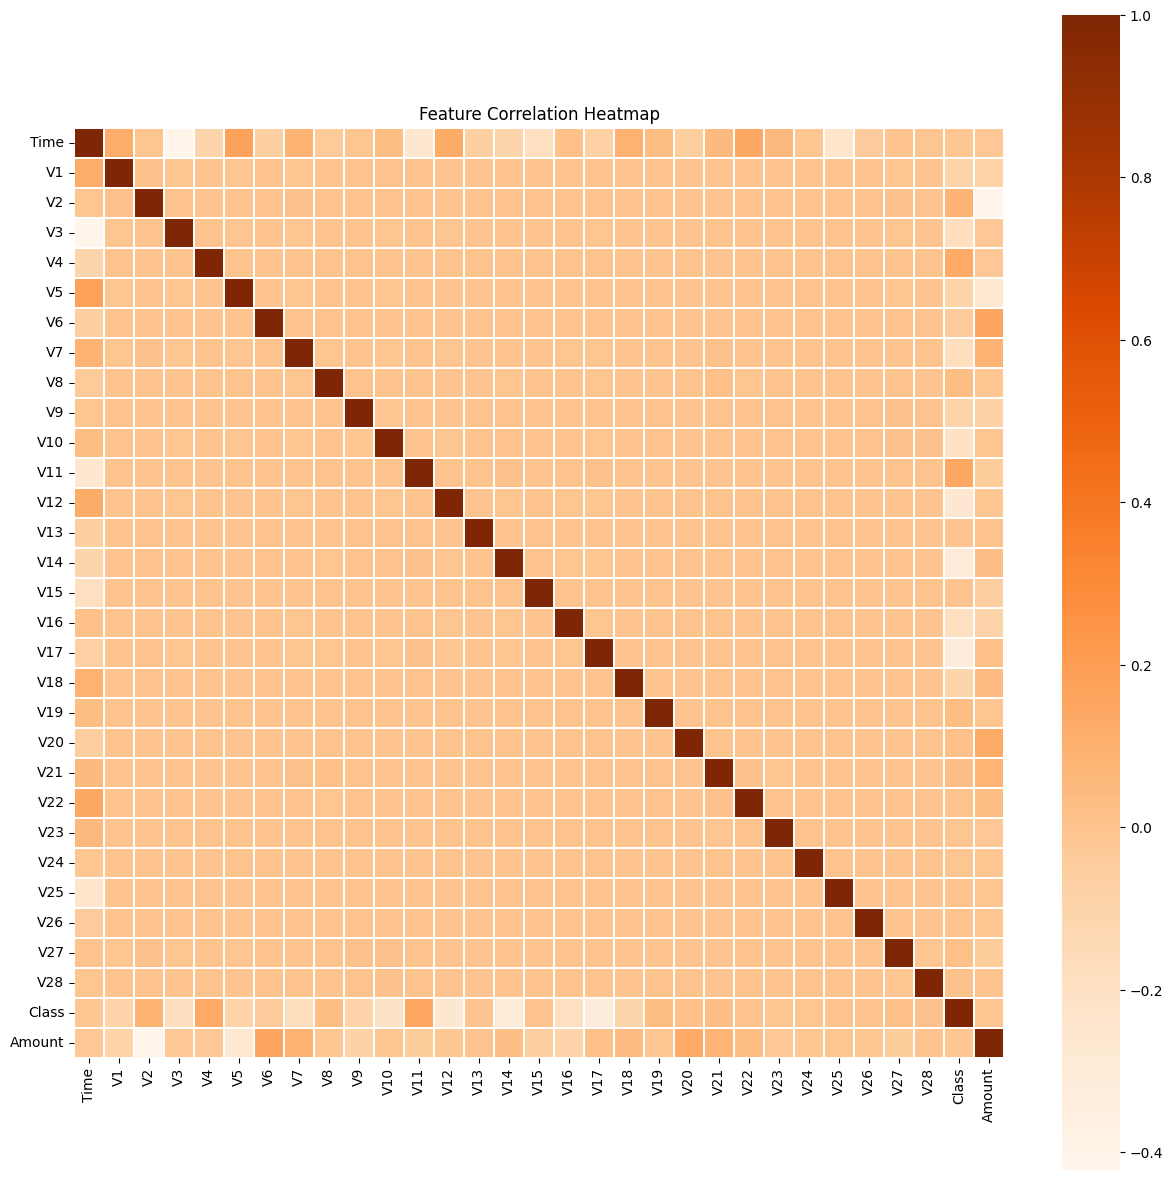

In [27]:
#Creating Heat Map of the correalation of features

plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), cmap = plt.cm.Oranges , linewidths=0.1, vmax=1.0, square=True, linecolor='white')

plt.title('Feature Correlation Heatmap')

plt.show()

**Feature Correlation Analysis:**<br>
The majority of features exhibit **low correlation** with each other. This characteristic indicates a lack of strong linear relationships between variables.

Addressing this on a large dataset involves **dimension reduction**, wherein the focus is on key dimensions to efficiently capture the essence of the problem. This approach not only saves computational resources but also minimizes the impact on accuracy, allowing for a streamlined representation of the dataset while preserving essential information for effective model training and predictive performance.


In [34]:
df.to_csv('../data/updated_creditcard.csv', index=False)